In [61]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [2]:
missing_data = '-'

In [3]:
db = pd.read_csv('ODI-2018_clean.csv')
db

,timestamp,programme,ML,IR,stat,DB,gender,chocolate,neighbours,stand,money,random,good(1),good(2),y_birth,m_birth,d_birth,h_bed,m_bed
0,4/5/2018 11:22:56,QRM,no,no,yes,no,male,neither,-,no,0,7,Productive,Good sleep,1994,10,12,0,0
1,4/5/2018 11:23:04,CS,no,no,-,yes,male,ignorant,-,yes,-,-,got a 8.5,got 2 8.5s,1993,6,8,0,0
2,4/5/2018 11:23:06,BA,yes,yes,no,yes,male,neither,5,no,-,6,Food,Sport,1992,12,25,20,44
3,4/5/2018 11:23:50,BA,yes,yes,yes,yes,male,ignorant,2,no,0,8,-,-,1995,1,2,0,0
4,4/5/2018 11:23:59,CS,no,no,no,yes,male,ignorant,6,no,0,8,sleep,beer,1994,9,1,-,-
5,4/5/2018 11:24:34,Drug Discovery and Safety,no,no,yes,no,male,fat,4,no,100,-,Chocolate,Doing nothing,1994,8,17,0,0
6,4/5/2018 11:25:25,CS,yes,yes,yes,no,male,neither,5,no,1,-,Chocolate,More chocolate,1993,9,27,9,0
7,4/5/2018 11:25:25,CLS,no,no,yes,yes,male,fat,5,yes,0,3,Sunshine,Friends,1994,5,14,0,0
8,4/5/2018 11:25:36,EOR,no,no,yes,no,male,neither,2,no,0,-,Sun,Rain,-,11,4,0,0
9,4/5/2018 11:25:51,Bioinformatics,yes,yes,-,yes,male,slim,7,no,0,5,Free time,More free time,1993,8,19,1,0


In [4]:
# data set with all rows dropped that include missing data
db_reduced = db.replace(missing_data, np.nan).dropna()

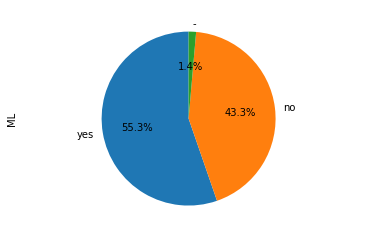

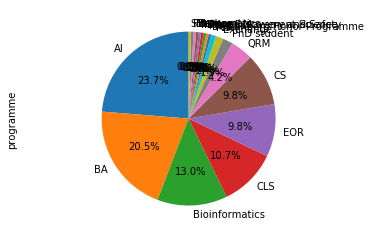

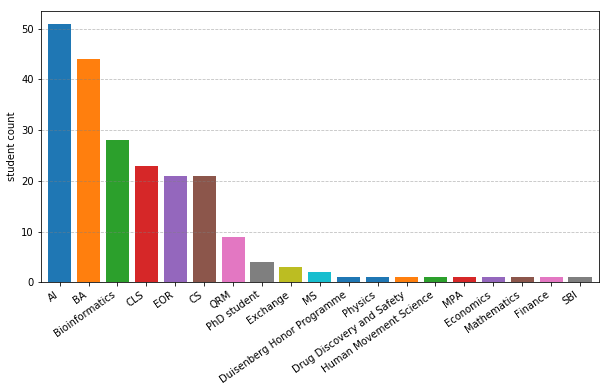

In [5]:
plt.figure()
plt.axis("equal")
db['ML'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, legend=False)
plt.show()

programmes = db.programme[db.programme != missing_data]

plt.figure()
plt.axis("equal")
programmes.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, legend=False)
plt.show()

plt.figure(figsize=(10,5))
ax = programmes.value_counts().plot(kind='bar', width=0.8)
ax.grid(color='gray', linestyle='--', axis='y', alpha=0.5)
ax.set_ylabel('student count')
plt.xticks(ax.get_xticks(), rotation=35, ha='right')
plt.show()

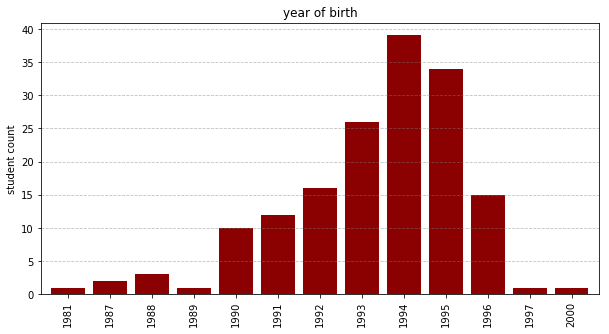

In [6]:
plt.figure(figsize=(10,5))
years = db.y_birth[db.y_birth != missing_data]
hist_years = years.value_counts().sort_index()
ax = hist_years.plot(kind='bar', width=0.8, color='darkred', title='year of birth')
ax.grid(color='gray', linestyle='--', axis='y', alpha=0.5)
ax.set_ylabel('student count')
plt.show()

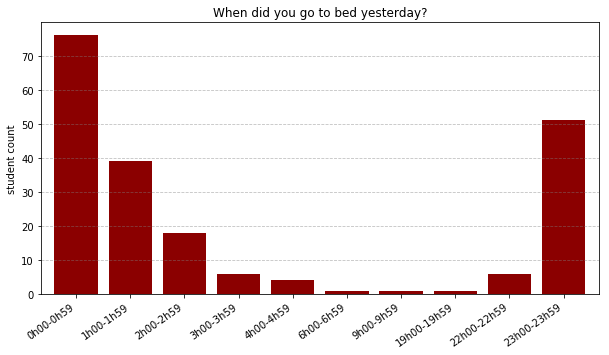

In [7]:
plt.figure(figsize=(10,5))
hours = db.h_bed[db.h_bed != missing_data].astype('float')
hist_hours = hours.value_counts().sort_index()
ax = hist_hours.plot(kind='bar', width=0.8, color='darkred', title='When did you go to bed yesterday?')
ax.grid(color='gray', linestyle='--', axis='y', alpha=0.5)
ax.set_ylabel('student count')
ax.set_xticklabels(['0h00-0h59','1h00-1h59','2h00-2h59','3h00-3h59','4h00-4h59','6h00-6h59','9h00-9h59','19h00-19h59','22h00-22h59','23h00-23h59'], rotation=35, ha='right')
plt.show()

In [10]:
money_programme = pd.DataFrame(db[['programme','money']], columns=['programme','money'])
money_programme = money_programme.replace(missing_data, np.nan)
money_programme.money = money_programme.money.apply(lambda x: x if float(x)<1000 else np.nan)
money_programme.dropna(inplace=True)

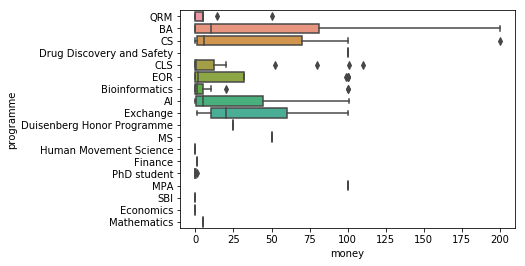

In [17]:
#money = db_reduced.money.astype(np.float)
#h_bed = db_reduced.h_bed.astype(np.float)
money = money_programme.money.astype(np.float)
programme = money_programme.programme

ax = sb.boxplot(y=programme, x=money)
#plt.xticks(ax.get_xticks(), rotation=35, ha='right')

In [25]:
money_ML = pd.DataFrame(db[['ML','money']], columns=['ML','money'])
money_ML = money_ML.replace(missing_data, np.nan)
money_ML.money = money_ML.money.apply(lambda x: x if float(x)<1000 else np.nan)
money_ML.dropna(inplace=True)

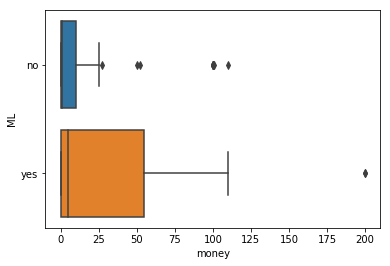

In [27]:
ax = sb.boxplot(y=money_ML.ML, x=money_ML.money.astype(np.float))

In [28]:
money_DB = pd.DataFrame(db[['DB','money']], columns=['DB','money'])
money_DB = money_DB.replace(missing_data, np.nan)
money_DB.money = money_DB.money.apply(lambda x: x if float(x)<1000 else np.nan)
money_DB.dropna(inplace=True)

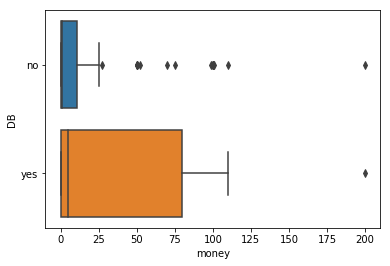

In [29]:
ax = sb.boxplot(y=money_DB.DB, x=money_DB.money.astype(np.float))

([<matplotlib.axis.XTick at 0x7f257c3f74e0>,
 <a list of 6 Text xticklabel objects>)

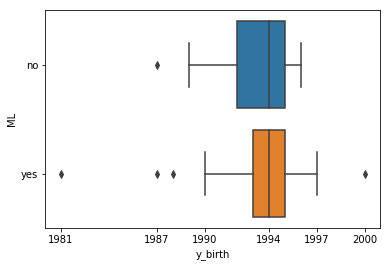

In [43]:
birth_ML = pd.DataFrame(db[['ML','y_birth']], columns=['ML','y_birth'])
birth_ML = birth_ML.replace(missing_data, np.nan).dropna()
ax = sb.boxplot(y=birth_ML.ML, x=birth_ML.y_birth.astype(np.int))
#plt.xticks(np.sort(birth_ML.y_birth.unique().astype(np.int)))
plt.xticks([1981,1987,1990,1994, 1997, 2000])


<Figure size 720x360 with 0 Axes>

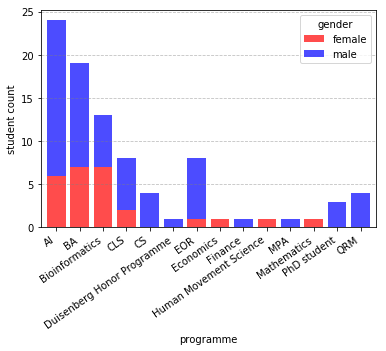

In [63]:
programme_gender_ct = pd.crosstab(db.replace(missing_data, np.nan).dropna().programme, db.replace(missing_data, np.nan).dropna().gender)

cmap = matplotlib.colors.ListedColormap(["red","blue"], name='from_list', N=None)
plt.figure(figsize=(10,5))
#ax1 = programme_gender_ct['male'].plot(kind='bar', width=0.8, alpha=0.5, color='b')
#ax2 = programme_gender_ct['female'].plot(kind='bar', width=0.8, alpha=0.5, color='r')
ax = programme_gender_ct.plot(kind='bar', width=0.8, stacked=True, cmap=cmap, alpha=0.7)
ax.grid(color='gray', linestyle='--', axis='y', alpha=0.5)
ax.set_ylabel('student count')
plt.xticks(ax.get_xticks(), rotation=35, ha='right')
plt.show()

In [64]:
programme_gender_ct

gender,female,male
programme,,
AI,6,18
BA,7,12
Bioinformatics,7,6
CLS,2,6
CS,0,4
Duisenberg Honor Programme,0,1
EOR,1,7
Economics,1,0
Finance,0,1
